In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv") 


In [3]:
data.shape

(243, 15)

In [4]:
data.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [5]:
data['Classes'] = data['Classes'].apply(lambda x: x.strip())

In [6]:
data['Classes'] = data['Classes'].apply(lambda x:0 if x == "not fire" else 1 if x== "fire" else 2)

In [7]:
data.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [8]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [10]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [11]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
data["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [13]:
print(data["Classes"].value_counts())


1    137
0    106
Name: Classes, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

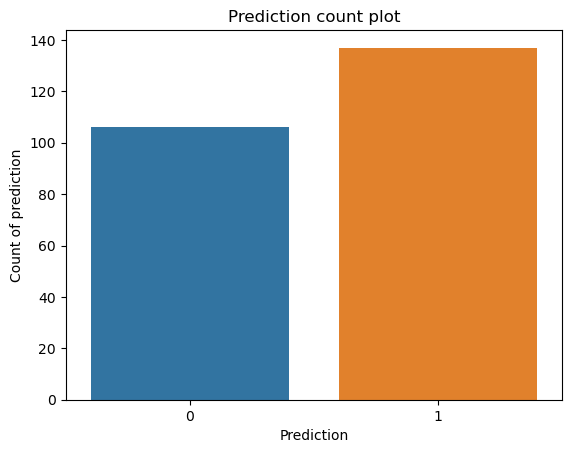

In [14]:
sns.countplot(x="Classes",data = data)
plt.xlabel("Prediction")
plt.ylabel("Count of prediction")
plt.title("Prediction count plot")
plt.show

In [15]:
data["Classes"]

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [16]:
selected_features = ['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Classes']
data = data[selected_features]

In [17]:
data

,day,month,year,Temperature,RH,Rain,Classes
0,1,6,2012,29,57,0.0,0
1,2,6,2012,29,61,1.3,0
2,3,6,2012,26,82,13.1,0
3,4,6,2012,25,89,2.5,0
4,5,6,2012,27,77,0.0,0
...,...,...,...,...,...,...,...
238,26,9,2012,30,65,0.0,1
239,27,9,2012,28,87,4.4,0
240,28,9,2012,27,87,0.5,0
241,29,9,2012,24,54,0.1,0


In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
print(X.shape)
print(y.shape)

(243, 6)
(243,)


In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=98)

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion= "gini",n_estimators=140,
                               max_depth=10,
                               min_samples_split= 3,
                               min_samples_leaf=1,
                               random_state=5)
# Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 140}

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=140,
                       random_state=5)

In [23]:
model.feature_importances_

array([0.14538699, 0.04476183, 0.        , 0.2034055 , 0.20943703,
       0.39700864])

In [24]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Classes'], dtype='object')

In [27]:
y_pred = model.predict(X_test)

In [28]:
type(y_pred)

numpy.ndarray

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[28,  2],
       [ 0, 31]], dtype=int64)

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X_train,y_train,cv =15)

array([0.76923077, 0.53846154, 1.        , 0.91666667, 1.        ,
       0.75      , 1.        , 0.91666667, 0.75      , 0.91666667,
       0.75      , 0.91666667, 0.75      , 0.91666667, 0.91666667])

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Separate features and target variable
X = data.drop(columns=['Classes'])  # Features
y = data['Classes']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.9387755102040817


In [31]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9672131147540983


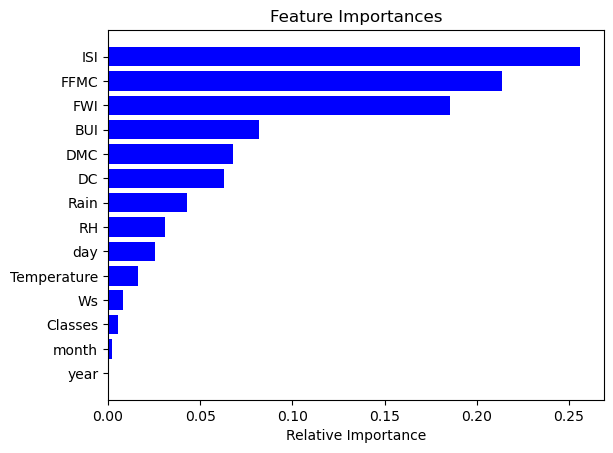

In [32]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b', align= 'center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4,5,6,7, 8,9, 10,11,12],
    'min_samples_split': [4,5,6,7, 8,9, 10,11,12],
    'n_estimators': [50,60,80,90,110,130,140 ,100, 150,70,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(criterion='gini', random_state=5),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# we select the best model with the custom params
best_model = grid_search.best_estimator_

# Here evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)


C:\Users\isvan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)


lr_model = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


svm_model = SVC(C=0.9, kernel='linear',degree=5,coef0=0.1, gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)


knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='brute', p=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)


Logistic Regression Accuracy: 0.8524590163934426
Support Vector Machine Accuracy: 0.8688524590163934
K-Nearest Neighbors Accuracy: 0.7049180327868853


In [69]:
import joblib


joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [34]:
from joblib import load


loaded_model = load('random_forest_model.joblib')




In [43]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100,110,120,140,150,160,170, 200,250,230, 300],
    'max_depth': [6,7, 8,9, 10,11, 12,13,14,15],
    'min_samples_split': [3,5,6, 7,8,9, 10],
    'min_samples_leaf': [1, 2,3, 4,5,6,7,8]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=5),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

best_model = grid_search.best_estimator_

# Here evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)



Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 140}
Accuracy on Test Set: 0.9672131147540983


In [52]:
day = input("Enter day (1-31): ")
month = input("Enter month (1-12): ")
year = input("Enter year: ")
temperature = input("Enter temperature: ")
rh = input("Enter relative humidity: ")
rain = input("Enter rainfall: ")

day = int(day)
month = int(month)
year = int(year)
temperature = float(temperature)
rh = float(rh)
rain = float(rain)


user_input = pd.DataFrame({'day': [day],
                           'month': [month],
                           'year': [year],
                           'Temperature': [temperature],
                           'RH': [rh],
                           'Rain': [rain]})


prediction = model(user_input)


if prediction == 0:
    print("Prediction: not fire")
elif prediction == 1:
    print("Prediction: fire")
else:
    print("Prediction: unknown")


Enter day (1-31): 20
Enter month (1-12): 10
Enter year: 3
Enter temperature: 21
Enter relative humidity: 53
Enter rainfall: 0.5


TypeError: 'RandomForestClassifier' object is not callable

In [51]:
model

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=140,
                       random_state=5)

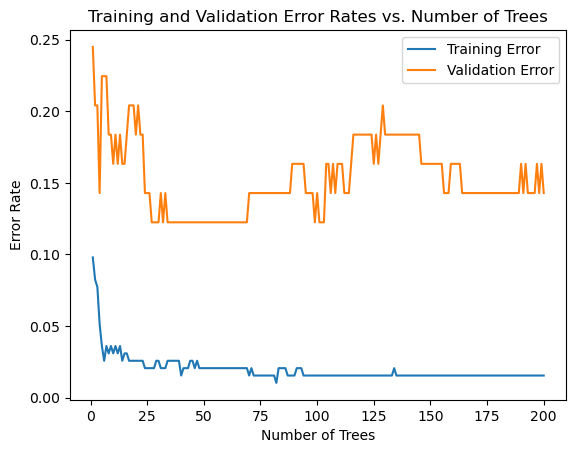

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path of your dataset

selected_features = ['day', 'month', 'year', 'Temperature', 'RH', 'Rain', 'Classes']
data = data[selected_features]


# Separate features (X) and target variable (y)
X = data.drop(columns=['Classes'])  # Assuming 'Classes' is the target variable
y = data['Classes']


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of hyperparameters for n_estimators
n_estimators_range = range(1, 201)  # Adjust the range as needed

# Define parameters for testing
params = {
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 3,
    'min_samples_leaf': 1,
    'random_state': 5
}

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Train a random forest model for each value of n_estimators and record the errors
for n_estimators in n_estimators_range:
    # Update the number of estimators in the parameters
    params['n_estimators'] = n_estimators
    
    # Initialize and train the random forest model
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    
    # Calculate training error
    y_train_pred = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Calculate validation error
    y_val_pred = model.predict(X_val)
    val_error = 1 - accuracy_score(y_val, y_val_pred)
    val_errors.append(val_error)

# Plot the training and validation errors
plt.plot(n_estimators_range, train_errors, label='Training Error')
plt.plot(n_estimators_range, val_errors, label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. Number of Trees')
plt.legend()
plt.show()


In [ ]:
model

In [179]:
import pickle
with open('NewRandomForestDump.pkl', 'wb') as file:
    pickle.dump(model, file)

In [184]:
# Assuming 'model' is your trained random forest model
num_features = len(model.feature_importances_)
print("Number of features:", num_features)


Number of features: 14


In [176]:
X

,day,month,year,Temperature,RH,Rain
0,1,6,2012,29,57,0.0
1,2,6,2012,29,61,1.3
2,3,6,2012,26,82,13.1
3,4,6,2012,25,89,2.5
4,5,6,2012,27,77,0.0
...,...,...,...,...,...,...
238,26,9,2012,30,65,0.0
239,27,9,2012,28,87,4.4
240,28,9,2012,27,87,0.5
241,29,9,2012,24,54,0.1


In [24]:
X_test

,day,month,year,Temperature,RH,Rain
161,10,7,2012,34,51,3.8
14,15,6,2012,28,80,3.1
220,8,9,2012,30,88,0.0
47,18,7,2012,31,68,0.0
45,16,7,2012,28,76,0.0
...,...,...,...,...,...,...
80,20,8,2012,35,68,0.0
68,8,8,2012,32,60,0.3
203,22,8,2012,37,53,0.0
216,4,9,2012,30,66,0.2


In [25]:
y_test

161    0
14     0
220    1
47     1
45     0
      ..
80     1
68     0
203    1
216    0
198    1
Name: Classes, Length: 61, dtype: int64

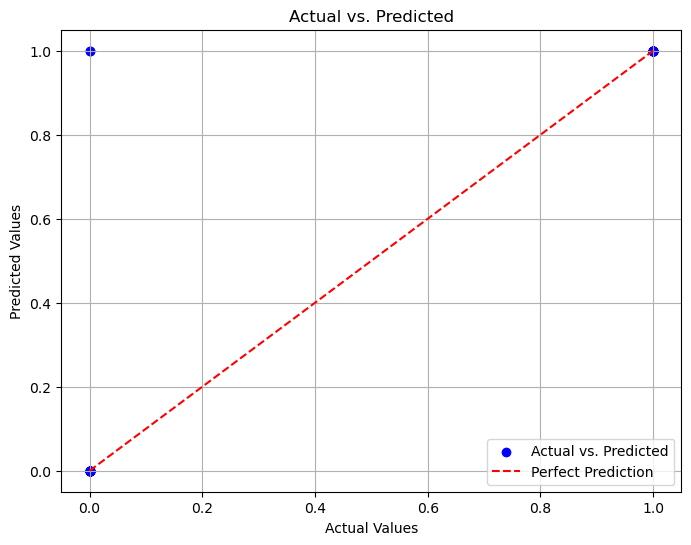

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()